### Data Visualization w/ Seaborn(intro)

#### Introduction
Create scatter plots and count plots with lists of data and pandas DataFrames. Will also introduce adding a third variable to the plots. <br></br>
<br></br>
<b>sns.scatterplot(x=x_axis, y=y_axis, data=data)</b> <br></br>
<b>sns.countplot(x=var)</b> Count number of unique values in given variable/DF <br></br>
<b>sns.countplot(x="col1", data=df)</b> Use countplot() method on pandas DF. Must be "tidy" data where each observation has its own row and each variable has its own column  <br></br>
<b>sns.scatterplot(..., hue="col3", hue_order=["txt","txt1"], palette=var)</b> Adds col3 to plot as a different color with a legend. hue_order modifies the legend. palette takes a dictionary with key-value pairs to control the colors. EX {"txt": "black", "txt1": "red"} <br></br>

In [1]:
# Import Matplotlib, pandas, and Seaborn
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

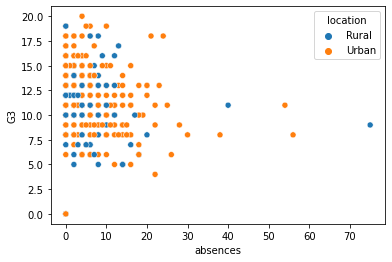

In [3]:
student_data=pd.read_csv("student-alcohol-consumption.csv")

# Change the legend order in the scatter plot
sns.scatterplot(x="absences", y="G3", 
                data=student_data, 
                hue="location", hue_order=["Rural", "Urban"])

# Show plot
plt.show()

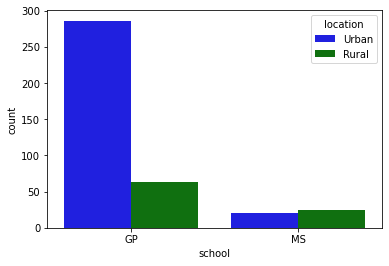

In [4]:
# Create a dictionary mapping subgroup values to colors
palette_colors = {"Rural": "green", "Urban": "blue"}

# Create a count plot of school with location subgroups
sns.countplot(x="school", data=student_data, hue="location", palette=palette_colors)



# Display plot
plt.show()

#### Visualizing Two Quantitative Variables
Create and customize plots that visualize relationshipts between two quantitative variables. Will also create subplots in a single figure. <br></br>
<br></br>
<b>sns.relplot(row="col1", col_wrap=2, col_order["col2", "col1"])</b> lets you create subplots in a single figure. Same parameters but need kind="type". Scatter or line are examples. Can substitute row for column to view horizontally. Can use both row and column at the same time. Col_wrap handles how many figures in each row. <br></br>
<b>sns.relplot(size="var", hue="var", style="var", alpha=0.4)</b> Size controls the size of each data point, style controls how each unique data point looks in a column, hue controls the color, and alpha controls transparancy <br></br>

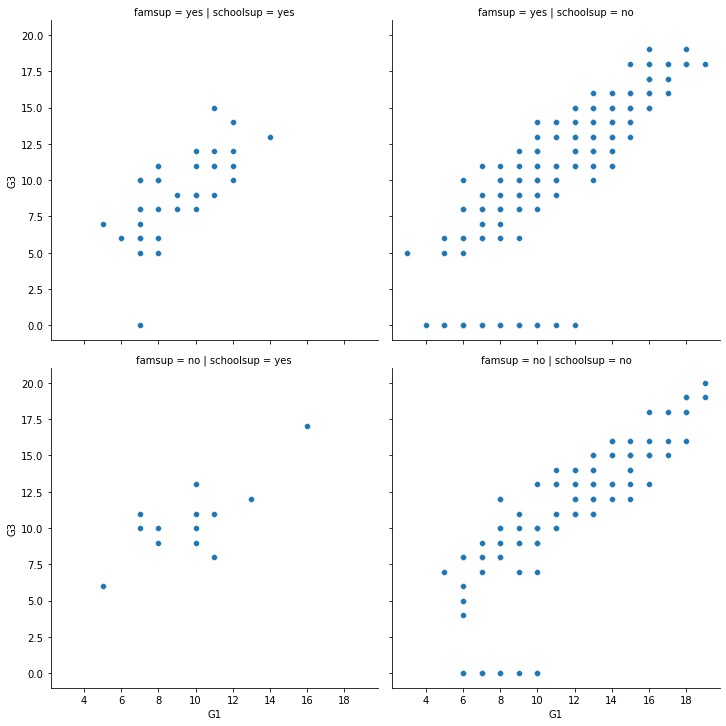

In [5]:
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",
            col_order=["yes", "no"], row="famsup", row_order=["yes", "no"])

# Show plot
plt.show()

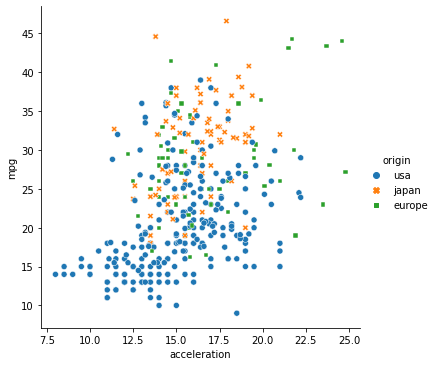

In [6]:
mpg=pd.read_csv("mpg.csv")

# Create a scatter plot of acceleration vs. mpg
sns.relplot(x="acceleration", y="mpg", data=mpg, kind="scatter", style="origin", hue="origin")

# Show plot
plt.show()

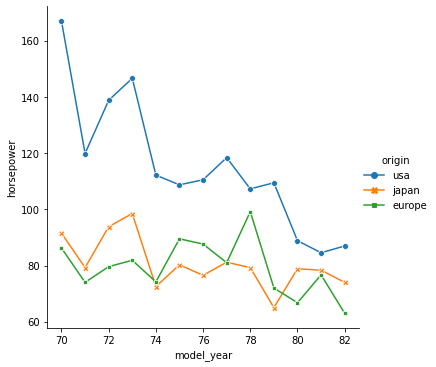

In [7]:
# Add markers and make each line have the same style
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", 
            hue="origin", dashes=False, markers=True)

# Show plot
plt.show()

#### Visualizing a Categorical and a Quantitative Variable
Create and customize box plots, bar plots, count plots, and point plots. <br></br>
<br></br>
<b>sns.catplot()</b> Categorical plots. Has kind parameter to make box plot. If using box plot sym="" omits the outliers, and  whis=[5,95] controls whiskers <- 5th and 95th percentiles are covered with whiskers <br></br>
<b>sns.catplot(kind="point", join=False, estimator=median, capsize=0.2)</b> join handles the connection between the points. estimator handles the confidence interval(ci), and capsize add caps to the end of the ci to a width of 0.2


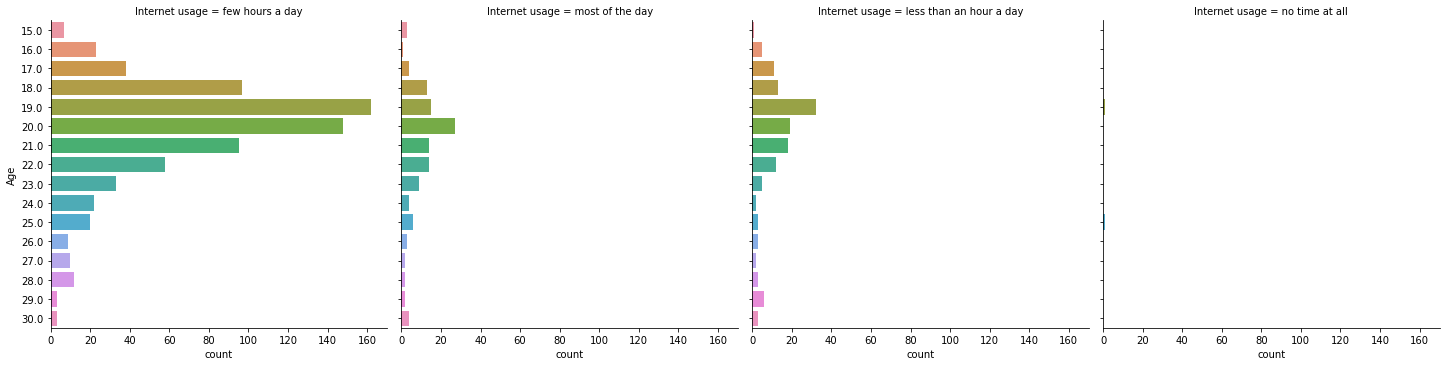

In [12]:
survey_data=pd.read_csv("young-people-survey-responses.csv")

# Separate into column subplots based on Internet usage
sns.catplot(y="Age", data=survey_data,
            kind="count", col="Internet usage")

# Show plot
plt.show()

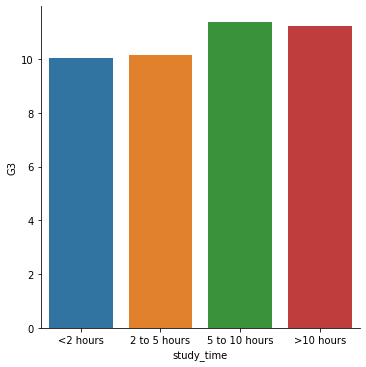

In [13]:
# List of categories from lowest to highest
category_order = ["<2 hours", 
                  "2 to 5 hours", 
                  "5 to 10 hours", 
                  ">10 hours"]

# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=category_order, ci=None)

# Show plot
plt.show()

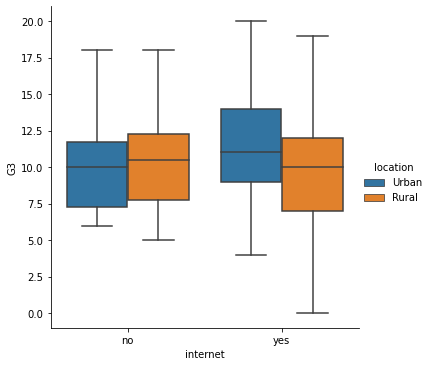

In [14]:
# Create a box plot with subgroups and omit the outliers
sns.catplot(x="internet", y="G3", data=student_data, kind="box", hue="location", sym="")

# Show plot
plt.show()

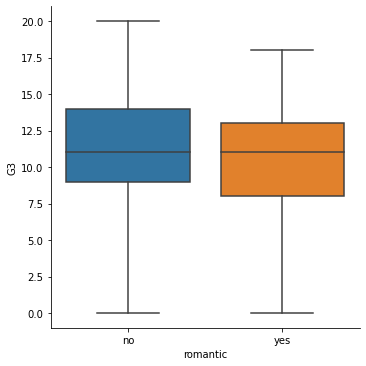

In [15]:
# Set the whiskers at the min and max values
sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

# Show plot
plt.show()

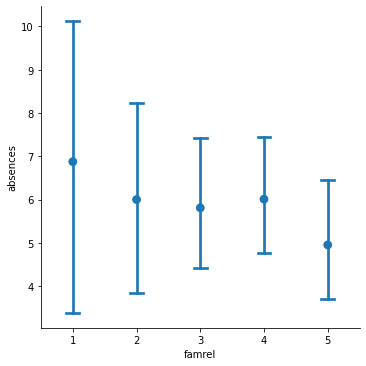

In [16]:
# Remove the lines joining the points
sns.catplot(x="famrel", y="absences",
			data=student_data,
            kind="point",
            capsize=0.2, join=False)
            
# Show plot
plt.show()

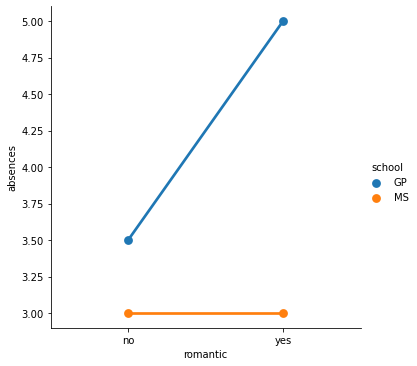

In [17]:
# Import median function from numpy
from numpy import median

# Plot the median number of absences instead of the mean
sns.catplot(x="romantic", y="absences",
			data=student_data,
            kind="point",
            hue="school",
            ci=None, estimator=median)

# Show plot
plt.show()

#### Customizing Seaborn Plots
Add informative plot titles and axis labels and customize the style of the visualization <br></br>
<br></br>
<b>sns.set_style("whitegrid")</b> More examples are darkgrid, ticks, and dark. <br></br>
<b>sns.set_palette("RdBu")</b> RdBu is a diverging palette where each end of palette is coresponding color. In this case it is red and blue with white in the middle. Another example is a sequential palette: "Blues", "PuRd"(Colors are mixed) <br></br>
<b>sns.set_context()</b> Changes the scale of the plot elements and labels. Options are "paper", "talk", "poster", and "notebook". \
<b>Facetgrid vs AxesSubplots</b> Facetgrid contains one or more axesSubplots which is why it supports subplots. sns.catplot() and sns.relplot() are facetgrid while sns.scatter() and sns.countplot() are axesSubplots \
<b>g.fig.suptitle("title", y=1.03)</b> Used for facetGrid figures. g is variable name for where sns.catplot() method is defined. y handles the height of the title and its default is 1 \
<b>g.set_title("title", y=1.03)</b> Used for axesSubplots
<b>g.set_titles("This is {col_name}")</b> Will give each axesSubplot the name This is "Name of column" "Number of column" \
<b>g.set(xlabel="x_label", ylabel="y_label")</b> Works with both axesSubplots andd Facetgrid. \
<b>plt.xticks(rotation=90)</b> Works with both axesSubplots andd Facetgrid


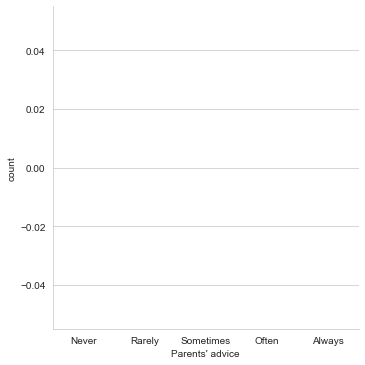

In [26]:
# Change the color palette to "RdBu"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents' advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)

# Show plot
plt.show()

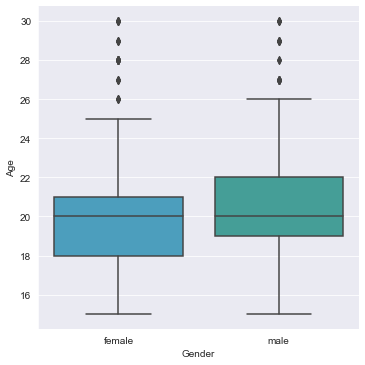

In [28]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

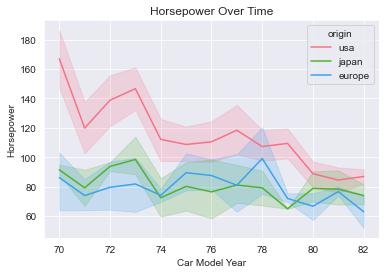

In [30]:
mpg=pd.read_csv("mpg.csv")
# Create line plot
g = sns.lineplot(x="model_year", y="horsepower", 
                 data=mpg,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Horsepower Over Time")

# Add x-axis and y-axis labels
g.set(xlabel="Car Model Year", ylabel="Horsepower")


# Show plot
plt.show()

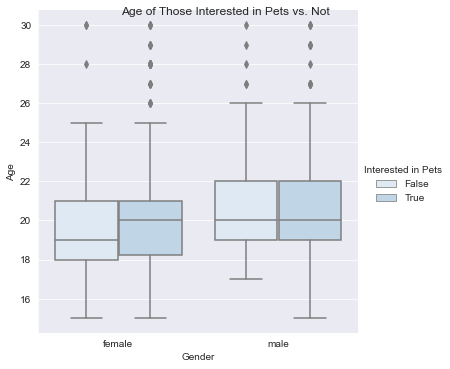

In [42]:
# Set palette to "Blues"
sns.set_palette("Blues")

survey_data["Interested in Pets"]= survey_data["Pets"] >1

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Interested in Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

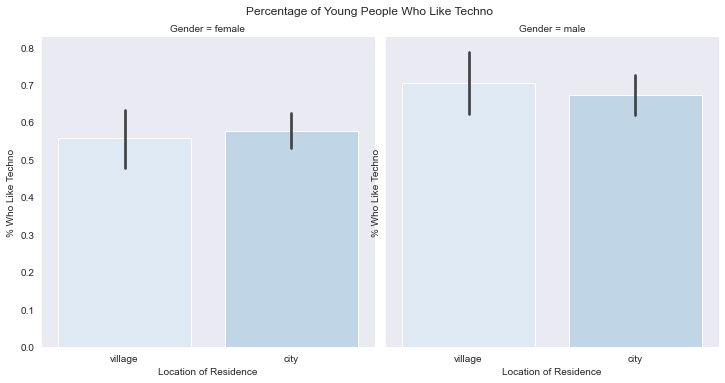

In [51]:
# Set the figure style to "dark"
sns.set_style("dark")

survey_data["Likes Techno"]= survey_data["Techno"] >1
# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Likes Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
       ylabel="% Who Like Techno")

# Show plot
plt.show()

#### Intermediate Data Visualization with Seaborn

In [ ]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv(grant_file)

In [ ]:
# Create a displot
sns.displot(df['Award_Amount'],
             bins=20)

# Display the plot
plt.show()

In [ ]:
# Create a displot of the Award Amount
sns.displot(df['Award_Amount'],
             kind='kde',
             rug=True,
             fill=True)

# Plot the results
plt.show()

In [ ]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(x="insurance_losses", y="premiums", data=df)



# Display the second plot
plt.show()

In [ ]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

In [ ]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()

#### Customizing Seaborn Plots
Circular color palettes are best when the data is not ordered \
Sequential color palettes are best when the data has a consistent range from H to L \
Diverging color palettes are best when both H and L values are interesting \
<b>sns.despine()</b> Removes top and right lines as a default. left=True to remove left spine(boarder) \
<b>sns.set(color_codes=True)</b> To use matplotlib color codes, color="g" parameter in ploting methods like displot() \
<b>for p in list_palettes:</b> can use sns.set_palette(p) to cyle over list_palettes. \
<b>sns.histplot(df["col"], ax=ax)</b> ax=ax argument plots the data on the given axes defined using matplotlib \
<b>ax.set(xlabel="" ylabel="", xlim=(0, 10), title="")</b> Diff arguments that can be used for ax.set method \
<b>sns.histplot(df.query("col == 'col_value'")["col2"], ax=ax1)</b> Using query() method to plot data on a subplot(ax1). \
<b>ax.axvline(x=200, label="", linestyle="--")</b> Vertical dashed line will display in the plot \

In [ ]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine()

# Show the plot and clear the figure
plt.show()
plt.clf()

In [ ]:
# Set style, enable color code, and create a magenta displot
sns.set(color_codes=True)
sns.displot(df['fmr_3'], color='m')

# Show the plot
plt.show()

In [ ]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.displot(df['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

In [ ]:
pal = sns.color_palette(palette="Purples", n_colors=8)
sns.palplot(pal)
plt.show()

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.histplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()

In [ ]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=df["fmr_1"].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df["fmr_1"].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

In [ ]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.histplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.histplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

#### Categorical Plot Types

<b>sns.residplot(order=2)</b> Useful for understanding the appropriateness of a regression model. Ideally if the vallues are plotted randomly accross the horizontal line then a nonlinear model is appropiate. order=2 parameter if the values are more randomly distributed then a second order equation is more appropiate \
<b>sns.regplot(x_estimator=np.mean, x_bins=4, order=2)</b> Polynomial regression is plotted using the order argument. \
<b>pd.crosstab(df["col1"], df["col2"], values=df["col3"], aggfunc="mean").round(0)</b> Pandas crosstab() is frequently used to manipulate the data. It build a table to summarize the data by col1 and col2 to get mean on col3 values. Now we can create a heatmap with this crosstab() used \
<b>sns.heatmap(var_crosstab, annot=True, fmt="d", cmap="YlGnBu, cbar=False, center=var_crosstab.loc[9, 6])</b>annot turns on annotations in individual cells, fmt displays results as integers, cbar=False makes color bar not be displayed. Center colormap at values stored in [9,6]. \
<b>sns.heatmap(df[cols_var].corr())</b> Using pandas corr() to calculate the correlation between the values in the columns(cols_var) using heatmap. 


In [ ]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL')

plt.show()
plt.clf()

In [ ]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL',
            x_bins=5)

plt.show()
plt.clf()

In [ ]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL',
            x_bins=5,
            order=2)

plt.show()
plt.clf()

In [ ]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

#### Creating Plots on Data Aware Grids

Seaborn grid plots require the data in "tidy format" \
catplot() is a simpler way to use FacetGrid for categorical data combining the facetting and mapping process into 1 funtion \
lmplot() provides shortcut for plotting regression and scatter plots on FacetGrids
<b>sns.pairplot(df, vars=["col1", "col2"], kind=reg, diag_kind="hist")</b> Similar to lmplot, catplot, and FacetGrid but in pairplot you only have to define the column values you want to compare. vars=[] are the df columns we want to compare. We define kind="reg" to plot regression plots but in the diagonal we want a histogram instead.
<b>sns.pairplot(df.query("col4 < 3"), vars=["col1", "col2", "col3"], hue=col4, palette="husl", plot_kws={"alpha":0.5})</b> plot_kws(plot_keywords) to make values transparent on the plot. Since 3 variables were passed 9 plots will disploy.

In [ ]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

In [ ]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

In [ ]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

In [4]:
import numpy as np
from scipy.stats import poisson

sample = np.random.poisson(lam=5,size=100)


print(sample)

[ 3  2  6  6 10  2  4  7  7  5  8  5  3  3  3  4  6  4  7  5 11  4  7  5
  7  8  4  6  5  7  7  6  9  5  7  2  8  3  4  5  4  4  5  8  6  3  7  6
 10  5  4  8  5  2  4  7  6  4  2  4  2  5  3  5  7  5  6  1  8  7 10  3
  6  6  3  0  7  8  6  5  8  5  9 10  6  6  1  4  4  5  4  7  3  3  5  4
 12  4  2  3]


In [ ]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

In [ ]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

In [ ]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()